In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math

In [13]:
data_directory = '/projects/b1118/miniscope/analysis/spatial_data/spatial_clustering/jones_script_analysis/fenobam_data_50um_bins/'
data_directory_ko = '/projects/b1118/miniscope/analysis/spatial_data/spatial_clustering/jones_script_analysis/fenobam_data_50um_bins/'

In [14]:
WT_sessions = ['DO_1_Day1_motion_corrected_h5', 'DO_1_Day2_motion_corrected_h5', 'DO_1_Day3_motion_corrected_h5',
               'DO_2_Day2_16_11_47', 'DO_2_Day1_16_46_28', 'DO_2_Day1_16_46_28_08_35', 'DO_3_Day_1_motion_corrected_h5', 
               'DO_3_Day2_15_41_21', 'DO_3_Day3_15_41_20', 'DO_3_Day3_15_49_55', 'DO_3_Day_3_16_06_35'] ; 

KO_sessions = ['DO_4_Day1_17_04_56', 'DO_4_Day_2_16_19_46', 'DO_4_Day_3_18_17_02', 'DO_5_Day_1_17_55_43', 
               'DO_5_Day_2_16_47_35', 'DO_5_Day_2_17_02_17', 'DO_5_Day_2_17_22_37', 'DO_5_Day_3_16_41_58', 
               'DO_6_Day_1_17_03_46', 'DO_6_Day_2_15_57_05', 'DO_6_Day_3_14_59_55'] ;

## compile and plot genotype data

In [15]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session = {}
for session in WT_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_ko = {}
for session in KO_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory_ko+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_ko[session] = session_output

DO_1_Day1_motion_corrected_h5
DO_1_Day2_motion_corrected_h5
DO_1_Day3_motion_corrected_h5
DO_2_Day2_16_11_47
DO_2_Day1_16_46_28
DO_2_Day1_16_46_28_08_35
DO_3_Day_1_motion_corrected_h5
DO_3_Day2_15_41_21
DO_3_Day3_15_41_20
DO_3_Day3_15_49_55
DO_3_Day_3_16_06_35
DO_4_Day1_17_04_56
DO_4_Day_2_16_19_46
DO_4_Day_3_18_17_02
DO_5_Day_1_17_55_43
DO_5_Day_2_16_47_35
DO_5_Day_2_17_02_17
DO_5_Day_2_17_22_37
DO_5_Day_3_16_41_58
DO_6_Day_1_17_03_46
DO_6_Day_2_15_57_05
DO_6_Day_3_14_59_55


In [16]:
jaccard_analysis_by_session

{'DO_1_Day1_motion_corrected_h5': {'normlBinnedCellJaccards':         0       1       2       3       4       5       6       7        8
  0  4.9452  2.5402  2.0364  1.8084  1.6285  1.3494  1.2618  1.3547  0.44669},
 'DO_1_Day2_motion_corrected_h5': {'normlBinnedCellJaccards':         0       1      2       3       4       5       6   7   8
  0  8.6725  4.2407  3.973  4.3009  5.9951  3.3532  2.3889 NaN NaN},
 'DO_1_Day3_motion_corrected_h5': {'normlBinnedCellJaccards':        0       1       2       3      4       5       6       7       8
  0  12.01  5.5348  3.9343  3.5056  2.986  2.2054  2.2908  2.9741  4.7637},
 'DO_2_Day2_16_11_47': {'normlBinnedCellJaccards':         0       1       2       3       4       5      6       7       8
  0  5.1437  3.3647  3.0948  2.9674  2.9607  2.8501  2.612  2.3099  1.6023},
 'DO_2_Day1_16_46_28': {'normlBinnedCellJaccards':        0       1       2       3       4       5       6       7       8
  0  6.309  3.6391  3.4492  2.9873  2.8277  2.5236  1

In [25]:
#plot across sessions
genotype_compiled = pd.concat([jaccard_analysis_by_session[session]['normlBinnedCellJaccards'] for session in WT_sessions], keys=WT_sessions)
genotype_compiled_ko = pd.concat([jaccard_analysis_by_session_ko[session]['normlBinnedCellJaccards'] for session in KO_sessions], keys=KO_sessions)

genotype_compiled.to_csv('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_iSPNs_50um_bins.csv')
genotype_compiled_ko.to_csv('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_ko_iSPNs_50um_bins.csv')

In [26]:
#genotype_compiled_ko

In [27]:
#average multiple sessions per day

#wt 
wt_by_day = {}
wt_by_day['DO_1_Day1'] = genotype_compiled.loc['DO_1_Day1_motion_corrected_h5']
wt_by_day['DO_1_Day2'] = genotype_compiled.loc['DO_1_Day2_motion_corrected_h5']
wt_by_day['DO_1_Day3'] = genotype_compiled.loc['DO_1_Day3_motion_corrected_h5']
wt_by_day['DO_2_Day1'] = pd.DataFrame(genotype_compiled.loc[['DO_2_Day1_16_46_28','DO_2_Day1_16_46_28_08_35']].mean(axis=0)).transpose()
wt_by_day['DO_2_Day2'] = genotype_compiled.loc['DO_2_Day2_16_11_47']
wt_by_day['DO_3_Day1'] = genotype_compiled.loc['DO_3_Day_1_motion_corrected_h5']
wt_by_day['DO_3_Day2'] = genotype_compiled.loc['DO_3_Day2_15_41_21']
wt_by_day['DO_3_Day3'] = pd.DataFrame(genotype_compiled.loc[['DO_3_Day3_15_41_20', 'DO_3_Day3_15_49_55', 'DO_3_Day_3_16_06_35']].mean(axis=0)).transpose()

wt_by_day = pd.concat(wt_by_day.values(), keys=wt_by_day.keys())

#ko 
ko_by_day = {}
ko_by_day['DO_4_Day1'] = genotype_compiled_ko.loc['DO_4_Day1_17_04_56']
ko_by_day['DO_4_Day2'] = genotype_compiled_ko.loc['DO_4_Day_2_16_19_46']
ko_by_day['DO_4_Day3'] = genotype_compiled_ko.loc['DO_4_Day_3_18_17_02']
ko_by_day['DO_5_Day1'] = genotype_compiled_ko.loc['DO_5_Day_1_17_55_43']
ko_by_day['DO_5_Day2'] = pd.DataFrame(genotype_compiled_ko.loc[['DO_5_Day_2_16_47_35', 'DO_5_Day_2_17_02_17', 'DO_5_Day_2_17_22_37']].mean(axis=0)).transpose() 
ko_by_day['DO_5_Day3'] = genotype_compiled_ko.loc['DO_5_Day_3_16_41_58']
ko_by_day['DO_6_Day1'] = genotype_compiled_ko.loc['DO_6_Day_1_17_03_46']
ko_by_day['DO_6_Day2'] = genotype_compiled_ko.loc['DO_6_Day_2_15_57_05']
ko_by_day['DO_6_Day3'] = genotype_compiled_ko.loc['DO_6_Day_3_14_59_55']

ko_by_day = pd.concat(ko_by_day.values(), keys=ko_by_day.keys())

In [28]:
wt_by_day.to_csv('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_iSPNs_50um_bins.csv')
wt_by_day


,,0,1,2,3,4,5,6,7,8
DO_1_Day1,0,4.9452,2.540200,2.036400,1.808400,1.628500,1.349400,1.261800,1.354700,0.44669
DO_1_Day2,0,8.6725,4.240700,3.973000,4.300900,5.995100,3.353200,2.388900,NaN,NaN
DO_1_Day3,0,12.0100,5.534800,3.934300,3.505600,2.986000,2.205400,2.290800,2.974100,4.76370
DO_2_Day1,0,5.6164,3.400400,3.169500,2.979400,2.929400,2.669100,2.296450,1.896900,1.81035
DO_2_Day2,0,5.1437,3.364700,3.094800,2.967400,2.960700,2.850100,2.612000,2.309900,1.60230
DO_3_Day1,0,24.2330,12.139000,11.722000,10.917000,10.210000,9.950700,9.895100,NaN,NaN
DO_3_Day2,0,18.3650,7.622600,6.372900,5.846700,5.638500,5.304600,3.378700,3.323000,2.48390
DO_3_Day3,0,9.0567,4.328167,3.612667,3.405867,3.133733,3.043433,2.518767,2.077933,0.52345


In [29]:
ko_by_day.to_csv('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_ko_iSPNs_50um_bins.csv')
ko_by_day

,,0,1,2,3,4,5,6,7,8
DO_4_Day1,0,6.772800,3.7902,3.690000,3.007000,2.48930,2.22620,2.25150,2.2948,1.516500
DO_4_Day2,0,13.609000,8.2950,5.673300,4.184800,3.69880,3.80720,3.94620,4.0004,3.168400
DO_4_Day3,0,7.394200,4.6751,3.387400,2.918400,2.45520,1.77710,2.35450,1.9398,2.544400
DO_5_Day1,0,38.849000,16.1070,10.385000,10.442000,9.68400,7.53470,7.44370,5.3780,5.102400
DO_5_Day2,0,15.912333,9.3079,8.297067,8.257833,8.19220,8.44860,7.85510,6.9539,5.521467
DO_5_Day3,0,9.692300,5.2795,4.373400,3.829900,4.22130,4.03980,4.11560,3.5219,6.138100
DO_6_Day1,0,7.339800,4.4197,3.464800,2.961000,2.68540,2.38060,2.65320,2.6914,2.232400
DO_6_Day2,0,4.234500,2.2144,1.644200,1.244900,0.91096,0.74812,0.76029,1.4912,NaN
DO_6_Day3,0,8.066600,2.7689,1.296000,1.107600,1.14340,0.72383,1.04080,1.2492,NaN


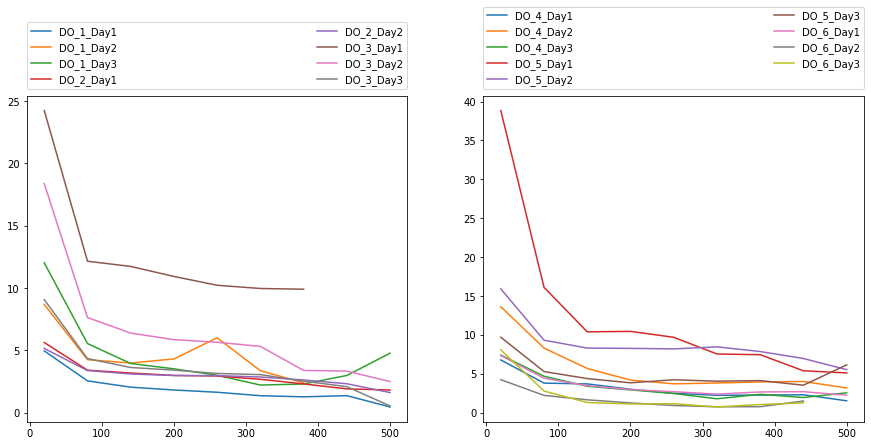

In [22]:
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(wt_by_day)):
    bin_vector = np.linspace(20, 500, len(wt_by_day.iloc[session,:].values))
    plt.plot(bin_vector, wt_by_day.iloc[session,:].values, label=list(wt_by_day.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(ko_by_day)):
    bin_vector = np.linspace(20, 500, len(ko_by_day.iloc[session,:].values))
    plt.plot(bin_vector, ko_by_day.iloc[session,:].values, label=list(ko_by_day.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_bysession_sidebyside_indiv_creoff.pdf', transparent=True)
plt.show()

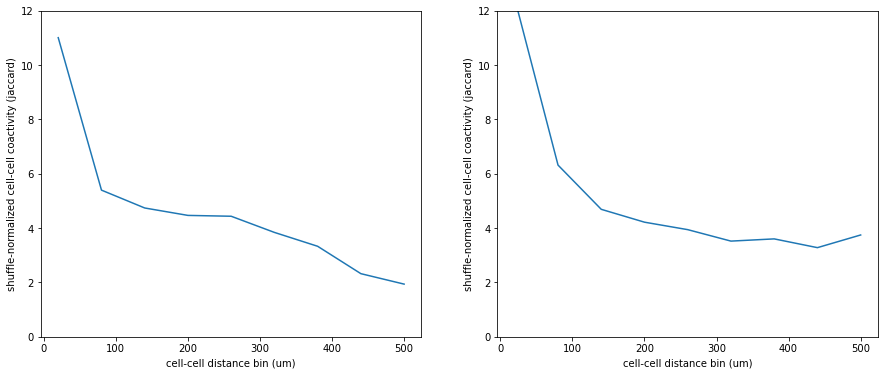

In [23]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, wt_by_day.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, ko_by_day.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,12))


fig.set_size_inches(15, 6)
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/coactivity_data_sidebyside_group_creoff.pdf', transparent=True)
plt.show()

## compile ko data

## overlay ko and wt 

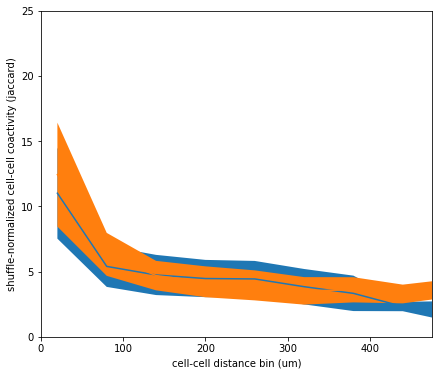

In [24]:
mean = wt_by_day.mean()
mean_ko = ko_by_day.mean()
std_error = wt_by_day.std()/math.sqrt(4)
std_error_ko = ko_by_day.std()/math.sqrt(7)
plt.plot(bin_vector, mean)
plt.plot(bin_vector, mean_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,25))
ax.set_xlim((0,475))
fig = plt.gcf()
fig.set_size_inches(7, 6)
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/combined_coactivity_creoff_50um_bins.jpg', transparent=True)
plt.show()